# Guilherme Fontana e Lucas Klug
#### Universidade de Caxias do Sul
#### Fundamentos de Inteligência Artificial

##Tratamento dos dados

####Importação das bibliotecas

In [3]:
from sklearn import metrics, neighbors, datasets, tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from imblearn.over_sampling import SMOTE
from google.colab import files, drive
from graphviz import Source

#### Leitura e tratamento dos dados

In [ ]:
#arquivo = files.upload()
#file = pd.read_csv('heart.csv')

Saving heart.csv to heart.csv


In [8]:
#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
file = pd.read_csv('/heart.csv')
file.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data = file.copy()

In [ ]:
def index_of_dic(dic, key):
    return dic[key]

def StrList_to_UniqueIndexList(lista):
    group = set(lista)

    dic = {}
    i = 0
    for g in group:
        if g not in dic:
            dic[g] = i
            i += 1

    return [index_of_dic(dic, p) for p in lista]


data['Sex'] = StrList_to_UniqueIndexList(data['Sex'])
data['ChestPainType'] = StrList_to_UniqueIndexList(data['ChestPainType'])
data['RestingECG'] = StrList_to_UniqueIndexList(data['RestingECG'])
data['ExerciseAngina'] = StrList_to_UniqueIndexList(data['ExerciseAngina'])
data['ST_Slope'] = StrList_to_UniqueIndexList(data['ST_Slope'])

display(data.head(5))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,1,0
1,49,1,3,160,180,0,1,156,0,1.0,2,1
2,37,0,1,130,283,0,0,98,0,0.0,1,0
3,48,1,0,138,214,0,1,108,1,1.5,2,1
4,54,0,3,150,195,0,1,122,0,0.0,1,0


In [ ]:
heart_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

X = data.values[:, :11]
y = data.values[:, 11]

#### Balanceamento de Classes - Método SMOTE
##### Os modelos gerados a seguir utilizam o balanceamento SMOTE.


In [ ]:
#Dados antes do balanceamento
print(pd.DataFrame(X, y))

       0    1    2      3      4    5    6      7    8    9    10
0.0  40.0  0.0  1.0  140.0  289.0  0.0  1.0  172.0  0.0  0.0  1.0
1.0  49.0  1.0  3.0  160.0  180.0  0.0  1.0  156.0  0.0  1.0  2.0
0.0  37.0  0.0  1.0  130.0  283.0  0.0  0.0   98.0  0.0  0.0  1.0
1.0  48.0  1.0  0.0  138.0  214.0  0.0  1.0  108.0  1.0  1.5  2.0
0.0  54.0  0.0  3.0  150.0  195.0  0.0  1.0  122.0  0.0  0.0  1.0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...
1.0  45.0  0.0  2.0  110.0  264.0  0.0  1.0  132.0  0.0  1.2  2.0
1.0  68.0  0.0  0.0  144.0  193.0  1.0  1.0  141.0  0.0  3.4  2.0
1.0  57.0  0.0  0.0  130.0  131.0  0.0  1.0  115.0  1.0  1.2  2.0
1.0  57.0  1.0  1.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0
0.0  38.0  0.0  3.0  138.0  175.0  0.0  1.0  173.0  0.0  0.0  1.0

[918 rows x 11 columns]


In [ ]:
sm = SMOTE(random_state=73, k_neighbors = 4)
X, y = sm.fit_resample(X, y)
#Dados depois do balanceamento
print(pd.DataFrame(X, y))

            0         1         2           3           4         5   \
0.0  40.000000  0.000000  1.000000  140.000000  289.000000  0.000000   
1.0  49.000000  1.000000  3.000000  160.000000  180.000000  0.000000   
0.0  37.000000  0.000000  1.000000  130.000000  283.000000  0.000000   
1.0  48.000000  1.000000  0.000000  138.000000  214.000000  0.000000   
0.0  54.000000  0.000000  3.000000  150.000000  195.000000  0.000000   
..         ...       ...       ...         ...         ...       ...   
0.0  66.173716  0.802389  0.000000  135.928316  304.383274  0.197611   
0.0  43.272495  0.324642  0.675358  116.104295  158.947853  0.000000   
0.0  45.425981  1.000000  1.990131  120.000000  274.504935  0.000000   
0.0  50.642063  0.000000  1.871587  113.761375    0.000000  0.000000   
0.0  45.332808  0.740799  3.000000  147.407992  255.296004  0.000000   

           6           7         8         9         10  
0.0  1.000000  172.000000  0.000000  0.000000  1.000000  
1.0  1.000000  156.

#### Normalização dos dados - Método MinMaxScaler

In [ ]:
#Dados antes da normalização
print(X)

[[40.          0.          1.         ...  0.          0.
   1.        ]
 [49.          1.          3.         ...  0.          1.
   2.        ]
 [37.          0.          1.         ...  0.          0.
   1.        ]
 ...
 [45.4259809   1.          1.99013079 ...  0.          0.
   1.        ]
 [50.6420632   0.          1.87158736 ...  0.37613755  0.68988885
   1.        ]
 [45.33280763  0.74079915  3.         ...  0.          0.
   1.        ]]


In [ ]:
normaliza = MinMaxScaler()
X=normaliza.fit_transform(X)
#Dados depois da normalização
print(X)

[[0.24489796 0.         0.33333333 ... 0.         0.29545455 0.5       ]
 [0.42857143 1.         1.         ... 0.         0.40909091 1.        ]
 [0.18367347 0.         0.33333333 ... 0.         0.29545455 0.5       ]
 ...
 [0.35563226 1.         0.66337693 ... 0.         0.29545455 0.5       ]
 [0.46208292 0.         0.62386245 ... 0.37613755 0.37385101 0.5       ]
 [0.35373077 0.74079915 1.         ... 0.         0.29545455 0.5       ]]


## Arvore de Decisão


#### Construção do objeto da classe Árvore de Decisão

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Aplicação do GridSearchCV
tree_para = {'criterion':['entropy','gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_leaf':[1,2,3,4,5]}
grid = GridSearchCV(tree, tree_para, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [ ]:
best_clf = grid.best_estimator_
print(best_clf)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


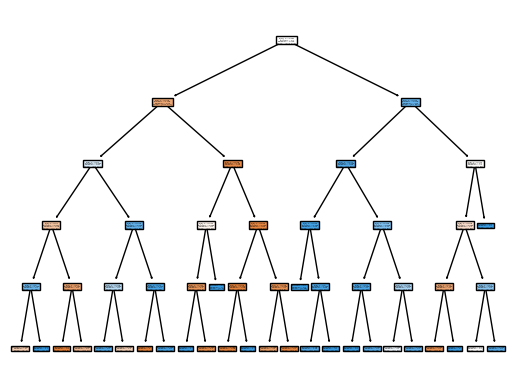

In [ ]:
plot_tree(best_clf, filled=True)
plt.show()

In [ ]:
print(export_text(best_clf))

|--- feature_10 <= 0.99
|   |--- feature_2 <= 0.01
|   |   |--- feature_8 <= 0.89
|   |   |   |--- feature_4 <= 0.07
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.07
|   |   |   |   |--- feature_7 <= 0.56
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_7 >  0.56
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_8 >  0.89
|   |   |   |--- feature_9 <= 0.38
|   |   |   |   |--- feature_4 <= 0.32
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_4 >  0.32
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_9 >  0.38
|   |   |   |   |--- feature_3 <= 0.44
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_3 >  0.44
|   |   |   |   |   |--- class: 1.0
|   |--- feature_2 >  0.01
|   |   |--- feature_4 <= 0.20
|   |   |   |--- feature_9 <= 0.39
|   |   |   |   |--- feature_3 <= 0.49
|   |   |   |  

#### Criação de conjuntos de treino e teste
#### Método de amostragem HoldOut

In [ ]:
#Criação de conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(711, 11) (711,)
(305, 11) (305,)


In [ ]:
#Treino com dados de treino
best_clf=best_clf.fit(X_train, y_train)

In [ ]:
#Armazena as predicões
predictions_train = best_clf.predict(X_test)

In [ ]:
#Gera a matriz de confusão
confusion_matrix(y_test,predictions_train)

array([[136,  26],
       [ 16, 127]])

<Axes: >

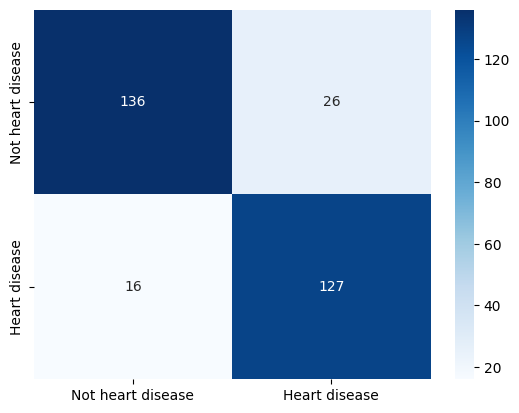

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions_train)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Cálculo da acurácia com dados de teste
accuracy_score(y_test,predictions_train)*100

86.22950819672131

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y_test,predictions_train,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       162
         1.0       0.83      0.89      0.86       143

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



#### Método de amostragem Cross-Validation

In [ ]:
#Armazena as predicões
predictions = cross_val_predict(best_clf,X,y,cv=10)

<Axes: >

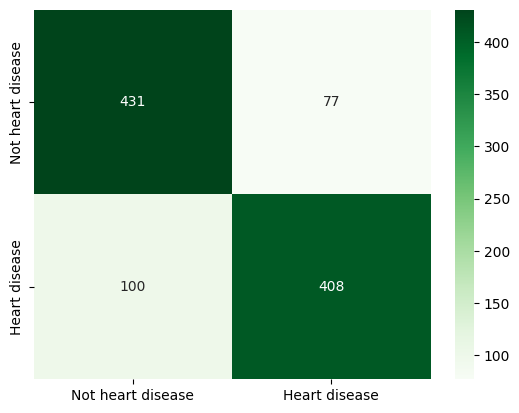

In [ ]:
cf = confusion_matrix(y,predictions)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2) # Mostra grafico

In [ ]:
#Cálculo da acurácia
print(accuracy_score(y,predictions)*100)

82.57874015748031


In [ ]:
#Métrica de avaliação por classe
print(classification_report(y,predictions,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       508
         1.0       0.84      0.80      0.82       508

    accuracy                           0.83      1016
   macro avg       0.83      0.83      0.83      1016
weighted avg       0.83      0.83      0.83      1016



#### Classificação Binária
#### AUC (Area Under Curve)


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8257874015748031


##KNN

#### Aplicação do método GridSearchCV

In [ ]:
#GridSearchCV
classificadorKnn = KNeighborsClassifier()
params = {'n_neighbors':[1,3,5,7,9],'weights':['uniform','distance'],'metric':['euclidean','minkowski','manhattan']}
grid = GridSearchCV(classificadorKnn, params)
grid_search=grid.fit(X, y)

In [ ]:
best_clf = grid.best_estimator_
print(best_clf)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


####Criação de conjuntos de treino e teste
#### Método de amostragem HoldOut

In [ ]:
#Criação de conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(711, 11) (711,)
(305, 11) (305,)


In [ ]:
#ClassificadorNeigh
ClassificadorNeigh=best_clf.fit(X_train, y_train)

In [ ]:
#Armazena as predicões
predictions_train = ClassificadorNeigh.predict(X_test)

In [ ]:
#Gera a matriz de confusão
confusion_matrix(y_test,predictions_train)

array([[135,  27],
       [ 13, 130]])

<Axes: >

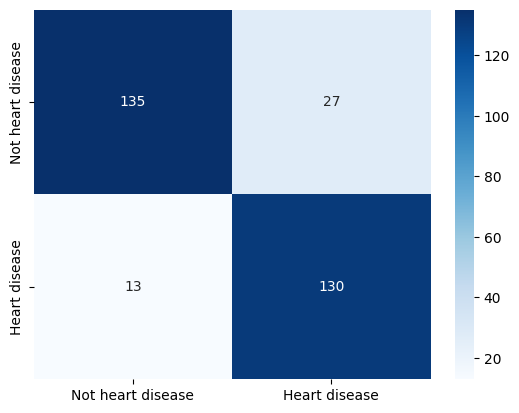

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions_train)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Cálculo da acurácia com dados de teste
accuracy_score(y_test,predictions_train)*100

86.88524590163934

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y_test,predictions_train,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       162
         1.0       0.83      0.91      0.87       143

    accuracy                           0.87       305
   macro avg       0.87      0.87      0.87       305
weighted avg       0.87      0.87      0.87       305



#### Método de amostragem Cross-Validation

In [ ]:
#Cross Validation
predictions_train2 = cross_val_predict(best_clf,X,y)

In [ ]:
#Gera a matriz de confusão dos dados de treino
confusion_matrix(y,predictions_train2)

array([[434,  74],
       [ 83, 425]])

<Axes: >

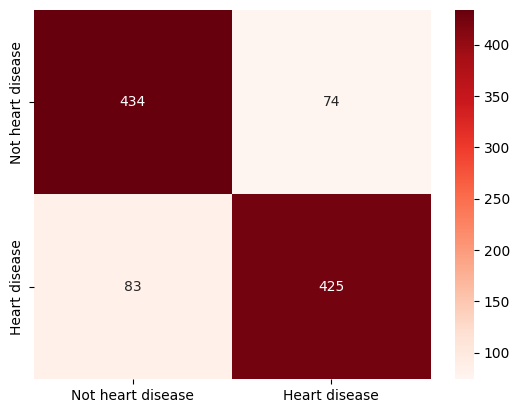

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y,predictions_train2)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Cálculo da acurácia com dados de teste
accuracy_score(y,predictions_train2)*100

84.54724409448819

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y,predictions_train2,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       508
         1.0       0.85      0.84      0.84       508

    accuracy                           0.85      1016
   macro avg       0.85      0.85      0.85      1016
weighted avg       0.85      0.85      0.85      1016



## Redes Bayesianas


### Modelo Gaussiano


In [ ]:
gnb = GaussianNB()
params = {'var_smoothing': [1e-9, 1e-6, 1e-12]}

gaussian_nb_grid = GridSearchCV(gnb, param_grid=params, n_jobs=-1, cv=5, verbose=5)
gaussian_nb_grid.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-06, 1e-12]}, verbose=5)

#### Criação de conjuntos de treino e teste
#### Método de amostragem HoldOut

In [ ]:
#Criacao de conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(711, 11) (711,)
(305, 11) (305,)


In [ ]:
gnb=gaussian_nb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
#Armazena as predicões
predictions_train = gnb.predict(X_test)

In [ ]:
#Gera a matriz de confusão do treino
confusion_matrix(y_test,predictions_train)

array([[134,  28],
       [ 20, 123]])

<Axes: >

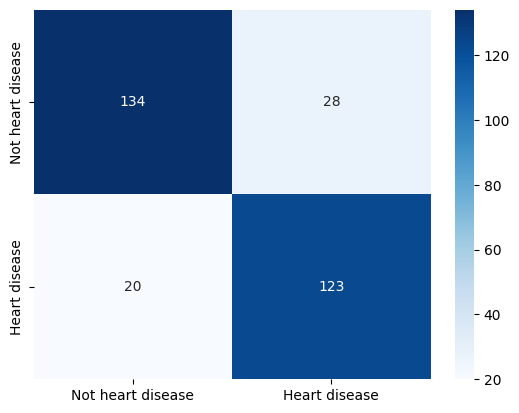

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions_train)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Cálculo da acurácia com dados de teste
accuracy_score(y_test,predictions_train)*100

84.26229508196721

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y_test,predictions_train,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       162
         1.0       0.81      0.86      0.84       143

    accuracy                           0.84       305
   macro avg       0.84      0.84      0.84       305
weighted avg       0.84      0.84      0.84       305




#### Método de amostragem Cross-Validation


In [ ]:
#Cross Validation
predictions = cross_val_predict(gnb,X,y,cv=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
#Gera a matriz de confusão do treino
print(confusion_matrix(y,predictions))

[[412  96]
 [ 76 432]]


<Axes: >

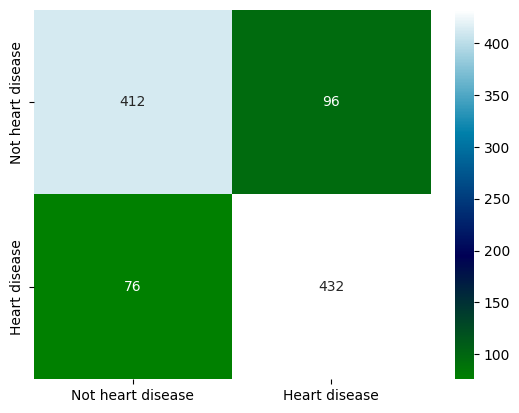

In [ ]:
cf = confusion_matrix(y,predictions)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="ocean", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Calcula acurácia do treino
accuracy_score(y,predictions)*100

83.07086614173228

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y,predictions,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       508
         1.0       0.82      0.85      0.83       508

    accuracy                           0.83      1016
   macro avg       0.83      0.83      0.83      1016
weighted avg       0.83      0.83      0.83      1016



### Modelo de Bernoulli

In [ ]:
gnbB = BernoulliNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 2, ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(gnbB, param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X,y)

bernoulli_nb_grid = bernoulli_nb_grid.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


#### Criação de conjuntos de treino e teste
#### Método de amostragem HoldOut

In [ ]:
#Criacao de conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(711, 11) (711,)
(305, 11) (305,)


In [ ]:
bernoulli_nb_grid=bernoulli_nb_grid.fit(X_train, y_train)

In [ ]:
#Armazena as predicões
predictions_train = bernoulli_nb_grid.predict(X_test)

In [ ]:
#Gera a matriz de confusão do treino
confusion_matrix(y_test,predictions_train)

array([[136,  26],
       [ 25, 118]])

<Axes: >

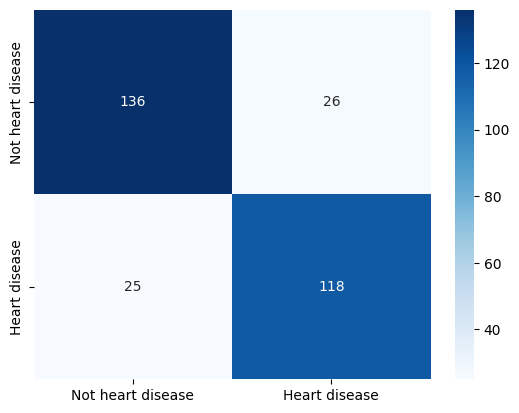

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions_train)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Cálculo da acurácia com dados de teste
accuracy_score(y_test,predictions_train)*100

83.27868852459017

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y_test,predictions_train,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       162
         1.0       0.82      0.83      0.82       143

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305




#### Método de amostragem Cross Validation


In [ ]:
#Cross Validation
predictions = cross_val_predict(bernoulli_nb_grid,X,y,cv=5)

In [ ]:
print(confusion_matrix(y,predictions))
print(classification_report(y,predictions,zero_division=0))

[[429  79]
 [109 399]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       508
         1.0       0.83      0.79      0.81       508

    accuracy                           0.81      1016
   macro avg       0.82      0.81      0.81      1016
weighted avg       0.82      0.81      0.81      1016



<Axes: >

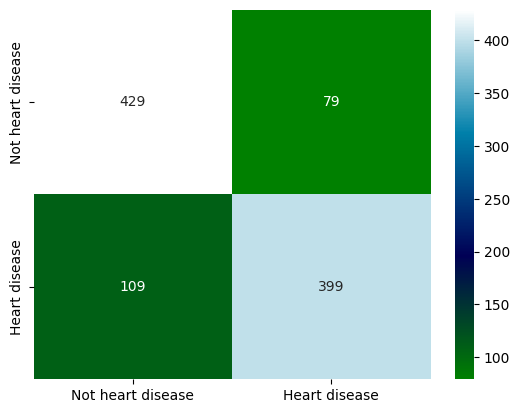

In [ ]:
cf = confusion_matrix(y,predictions)
lbl1=['Not heart disease', 'Heart disease']
lbl2 = ['Not heart disease', 'Heart disease']
sb.heatmap(cf,annot=True,cmap="ocean", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Calcula acurácia do treino
accuracy_score(y,predictions)*100

81.49606299212599

In [ ]:
#Métrica de avaliação por classe
print(classification_report(y,predictions,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       508
         1.0       0.83      0.79      0.81       508

    accuracy                           0.81      1016
   macro avg       0.82      0.81      0.81      1016
weighted avg       0.82      0.81      0.81      1016

